In [1]:
import pandas as pd
import numpy as np
import seaborn as sb

In [2]:
df = pd.read_csv("nonregdataex1.csv")

In [3]:
df.head()

,A,B,C,D,Target
0,60,-5,5,2,-3109
1,44,-3,1,3,1401
2,36,-3,4,3,-48
3,43,-4,5,3,-658
4,32,-5,6,3,-3288


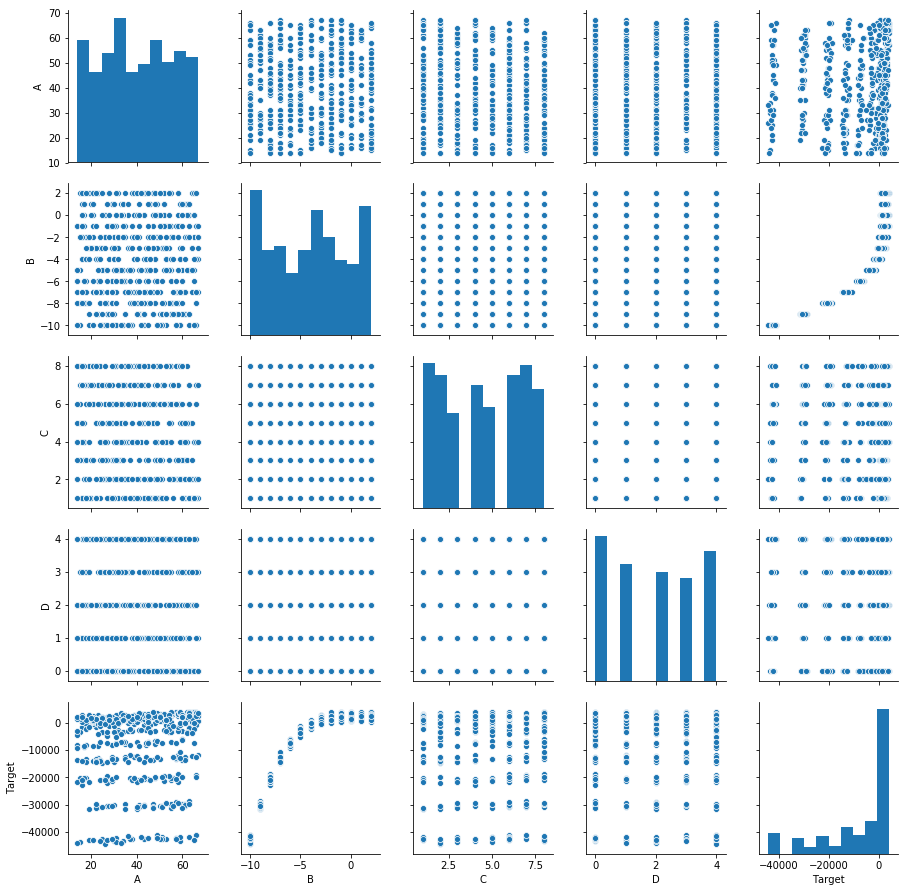

In [4]:
sb.pairplot(df)

In [4]:
import sklearn.linear_model as skl

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
model = skl.LinearRegression()

In [7]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(['Target'],axis=1), df['Target'], test_size=0.33, random_state=42)

In [8]:
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [9]:
pred = model.predict(X_test)

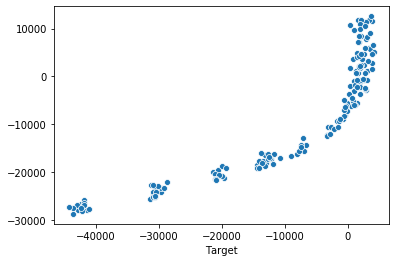

In [10]:
sb.scatterplot(y_test,pred)

In [11]:
model.score(X_test,y_test)

0.7743904059592976

In [12]:
from sklearn.preprocessing import PolynomialFeatures
# the degree-2 polynomial features are [1, a, b, a^2, ab, b^2].

In [15]:
samp = np.array([2,3,4]).reshape(-1,1)
cubic = PolynomialFeatures(degree=3)
cubic.fit_transform(samp)

array([[ 1.,  2.,  4.,  8.],
       [ 1.,  3.,  9., 27.],
       [ 1.,  4., 16., 64.]])

In [16]:
samp = np.array([[2,3],[4,5]])
cubic.fit_transform(samp)

array([[  1.,   2.,   3.,   4.,   6.,   9.,   8.,  12.,  18.,  27.],
       [  1.,   4.,   5.,  16.,  20.,  25.,  64.,  80., 100., 125.]])

In [17]:
X = df[['A','B','C','D']]
cubic = PolynomialFeatures(degree=2)
X_cubic = cubic.fit_transform(X)

In [18]:
X_cubic.her

(500, 15)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 5 columns):
A         500 non-null int64
B         500 non-null int64
C         500 non-null int64
D         500 non-null int64
Target    500 non-null int64
dtypes: int64(5)
memory usage: 19.6 KB


In [38]:
X_train, X_test, y_train, y_test = train_test_split(X_cubic, df['Target'], test_size=0.33, random_state=42)

In [39]:
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [40]:
model.coef_

array([ 0.00000000e+00,  3.25589024e+01, -1.11689921e+03,  3.86507762e+02,
        1.38447402e+02,  2.41804480e-01,  1.87338659e-01, -9.87541722e-01,
       -9.29425167e+00, -5.34200340e+02,  1.05015200e+01,  2.40715653e+01,
       -1.67861681e+01,  6.85149353e+01, -1.05381299e+01])

In [41]:
model.score(X_test,y_test)

0.9806345016635136

In [33]:
pred = model.predict(X_test)

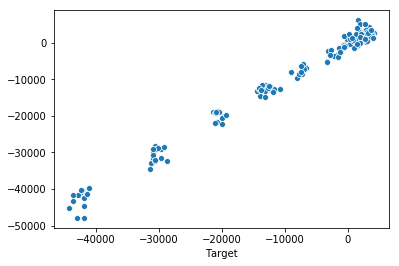

In [34]:
sb.scatterplot(y_test,pred)